# **Small CNN (LeNet-5)**

![LeNet-5](lenet5.png)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## **Load data**

Keras hosts several datasets that are commonly used as benchmarks. MNIST is one of them. Normalize pixel values to the range from 0 to 1, and reshape the tensor to the supported shape (#Images x Height x Width x #Channels)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, '\n')

# data normalization
x_train = np.expand_dims(x_train, 3)
x_train = x_train.astype(np.float32)
x_train /= 255

x_test = np.expand_dims(x_test, 3)
x_test = x_test.astype(np.float32)
x_test /= 255

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) uint8 uint8
(10000, 28, 28) (10000,) 

(60000, 28, 28, 1) (60000,) float32 uint8
(10000, 28, 28, 1) (10000,)


## **Dataset split**

Split training subset into training and validation.

In [4]:
shuffle = np.random.permutation(len(x_train))

x_val = x_train.take(shuffle[:10000], axis=0)
x_train = x_train.take(shuffle[10000:], axis=0)

y_val = y_train.take(shuffle[:10000], axis=0)
y_train = y_train.take(shuffle[10000:], axis=0)

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_val.shape, y_val.shape)

(50000, 28, 28, 1) (50000,) float32 uint8
(10000, 28, 28, 1) (10000,)


## **Define network architecture**

Create a CNN with two convolutional and two dense layers.

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

## **Training parameters**

Define learning rate, loss function, batch size, number of epochs, and how many times the model must be trained to obtain a reliable performance evaluation.

In [8]:
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 32
num_epochs = 50

## **Training loop**

Using callbacks to save the weights of the model in the epoch with highest validation accuracy. Stop the training if the validation accuracy does not improve for 3 epochs.

Epoch 1/50
1563/1563 [==============================] - 16s 8ms/step - loss: 0.2108 - accuracy: 0.9378 - val_loss: 0.0843 - val_accuracy: 0.9755
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0681 - accuracy: 0.9794 - val_loss: 0.0596 - val_accuracy: 0.9815
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0486 - val_accuracy: 0.9863
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0506 - val_accuracy: 0.9847
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0429 - val_accuracy: 0.9880
Epoch 6/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0474 - val_accuracy: 0.9861
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0218 - accuracy: 0.9928 - val_loss: 0.0569 - val_ac

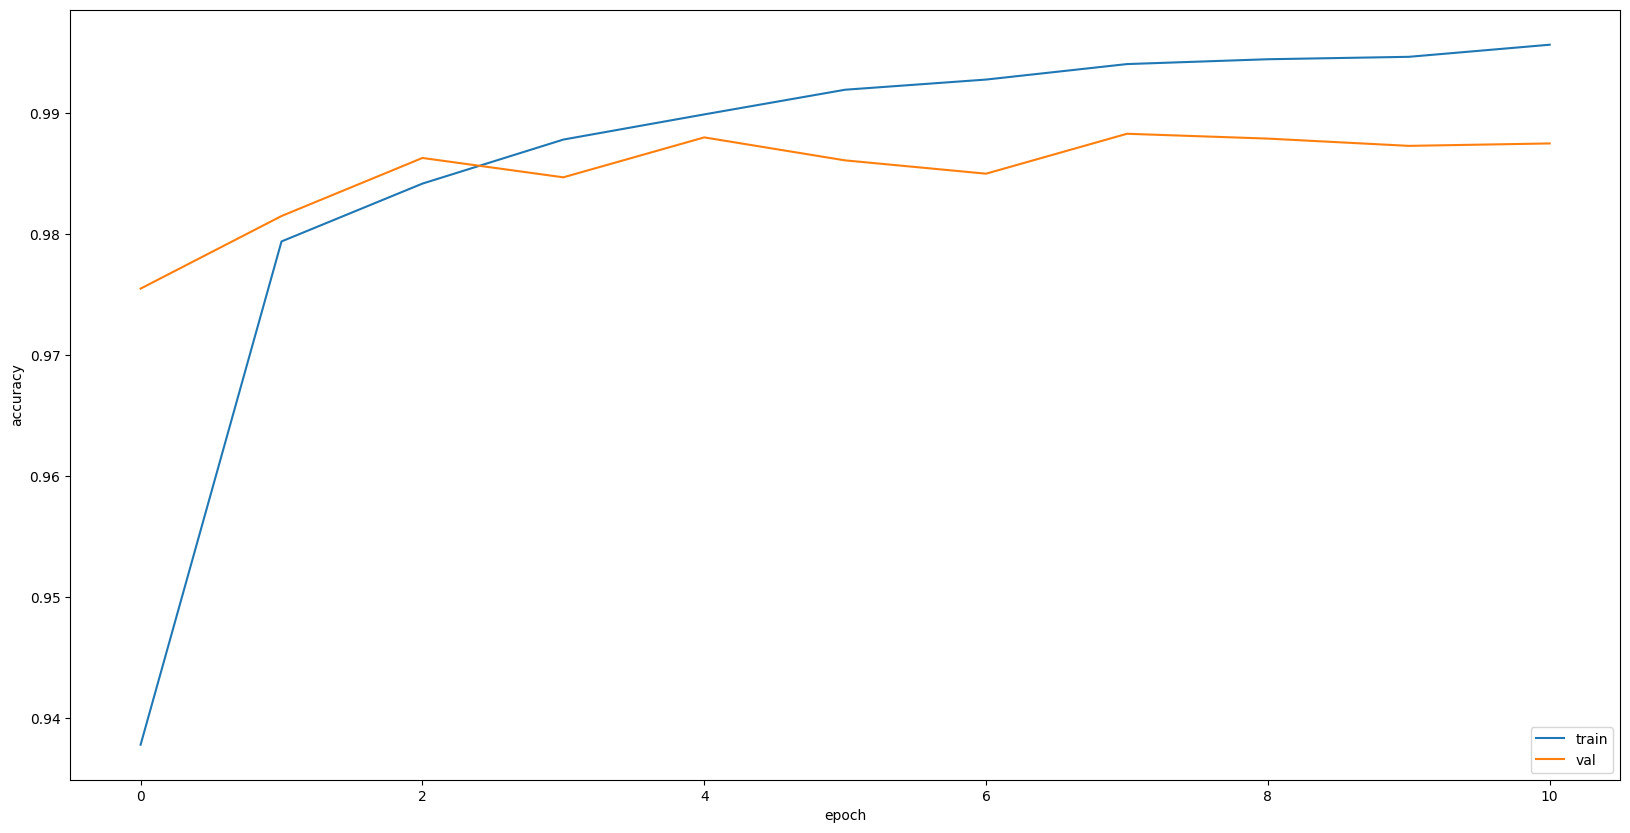

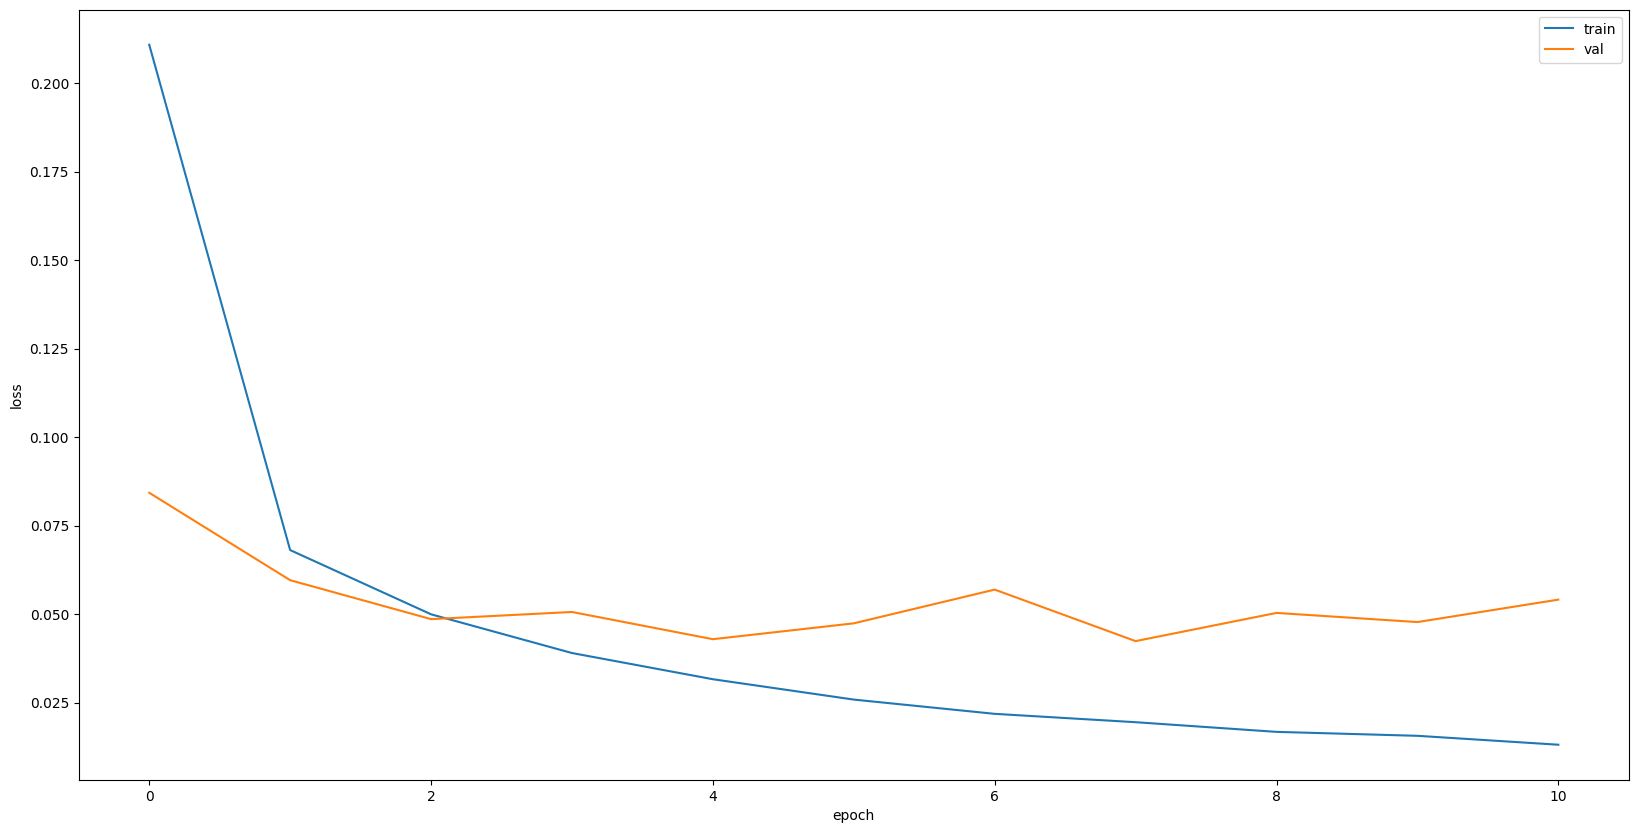

In [9]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1)
model_save = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[early_stop, model_save])

plt.rcParams["figure.figsize"] = (20,10)

# accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

## **Results**

Show results for each data subset separately.

In [10]:
# restore weights from the best training point
model.load_weights('best_model.h5')

scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_val, y_val, verbose=0)
print('\nVALIDATION SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

TRAINING SET
Loss: 0.011000588536262512 
Accuracy: 0.9964799880981445

VALIDATION SET
Loss: 0.04237253963947296 
Accuracy: 0.9883000254631042

TEST SET
Loss: 0.0354338064789772 
Accuracy: 0.9890000224113464
